## Import Necessary Libraries

In [2]:
# Import the necessary libraries for data exploration and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [10]:
# The forst step is we are importing our dataset and store it in a variable

from sklearn.datasets import load_boston

boston = load_boston()

In [11]:
# The boston variable itself is a dictionary, so you can check for its keys using the

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
# Now we want to check the shape of the data which lies into the boston dataset
# We can see below that we have 506 rows of data with 13 columns

boston.data.shape

(506, 13)

In [17]:
# Now we want to know what the 13 columns/features names  are

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
# The description of the dataset is available in the dataset itself 
# Lets check the description of the data set

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
# Data in the above output is not in the good format, let's convert the data into good format using pandas DataFrame
# And explore the top 5 rows of the dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# We notice that there is no column called PRICE in the DataFrame. This is because the target column is available in another attribute called boston.target
# Lets add the column PRICE/target into the dataframe

data['PRICE'] = boston.target

In [25]:
# Run the below command to get useful information about the data.
# Turns out that this dataset has 14 columns (including the target variable PRICE) and 506 rows. Notice that the columns are of float data-type indicating the presence of only continuous features with no missing values in any of the columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
# Let's get more summary statistics of the different features in the dataset

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
# Now we are building the XGBoost model dor our dataset 
# So lets import the necessary libraries for the xgboost and and separate the target/PRICE variable and rest of the variables to subset the data

import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [31]:
# Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

data_dmatrix = xgb.DMatrix(data = X, label = y)

## XGBoost's Hyperparameters

In [32]:
# Now, you will create the train and test set for cross-validation of the results Now, you will create the train and test set for cross-validation of the results

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [33]:
# Lets do the Regression for our xgb 

xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [36]:
# Fit the regressor to the training set and make predictions on the test set using the familiar

xgb_reg.fit(X_train, y_train)

preds = xgb_reg.predict(X_test)

[10:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
# Now compute the rmse(Route Mean Squared error)
# We can see that our RMSE for the price prediction came out to be around 10.8 per 1000$.

rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Mean Squared Error %f' % (rmse))

Mean Squared Error 10.423243


# k-fold Cross Validation Using XGBoost

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation.
All we have to do is specify the folds parameter, which is the number of cross validation sets we want to build.

In [40]:
# We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's Cross Validation method and store the results in a DataFrame. Note that here we are using the Dmatrix object we created before

params = {'objective': 'reg:linear', 'colsample_bytree': 0.3, 'learning_rate' : 0.1, 'max_depth' : 5, 'alpha': 10}

cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 3, num_boost_round = 50, early_stopping_rounds = 10, metrics = 'rmse', as_pandas = True, seed = 123)

[10:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
# cv_results contains train and test RMSE metrics for each boosting round

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [42]:
# Extract and print the final boosting round metric.
# We can see that our RMSE for the price prediction has reduced as compared to last time and came out to be around 4 per 1000$

print((cv_results['test-rmse-mean']). tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


## Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument

[10:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


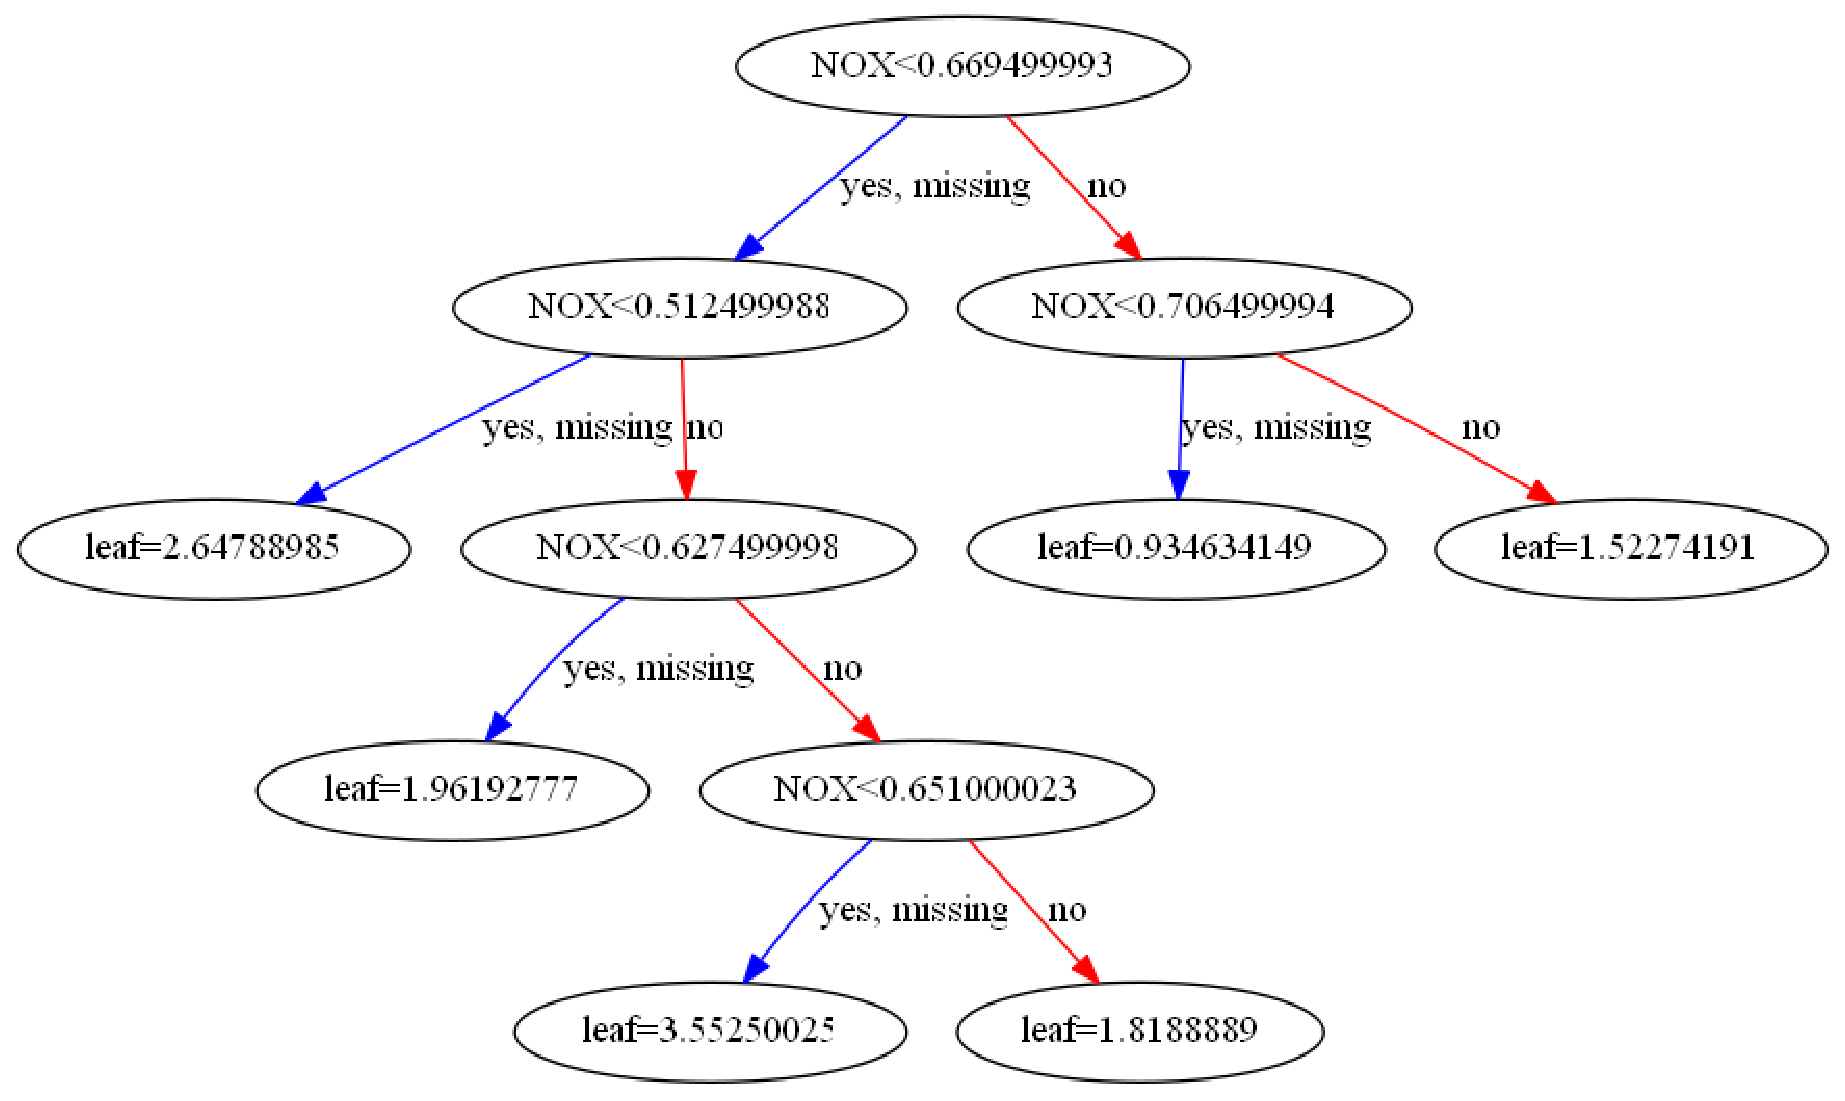

In [50]:
# Lets instatiate the object for plotting the tree

xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round = 10)

# Plotting the first tree with the matplotlib
# Plots below provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions
xgb.plot_tree(xg_reg, num_trees = 0)
plt.rcParams['figure.figsize'] = [60, 10]
plt.show()

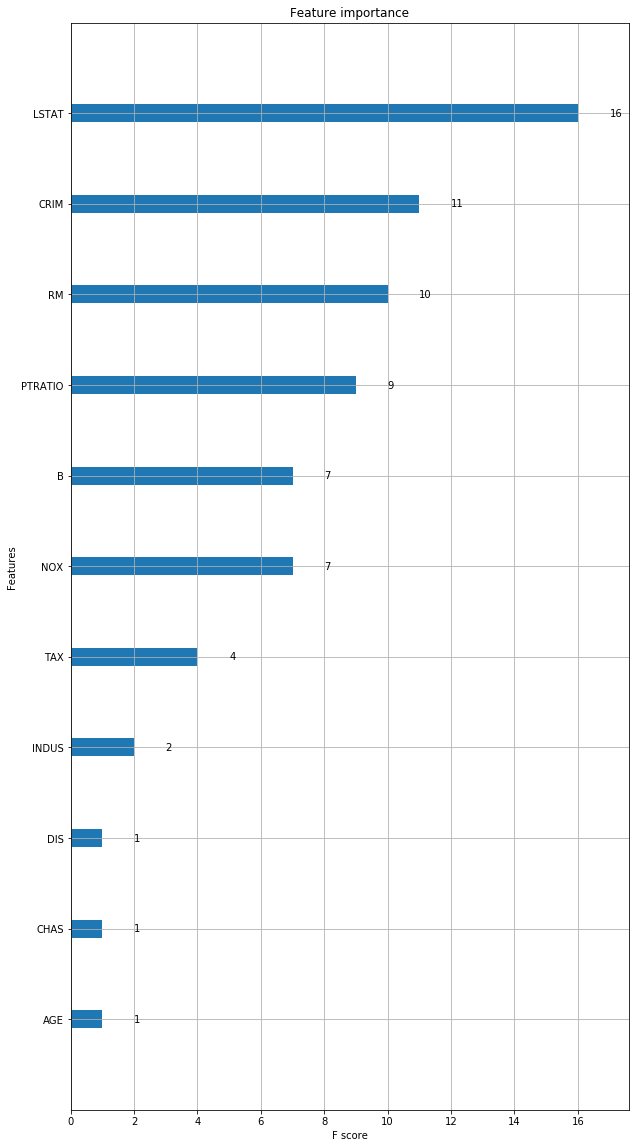

In [54]:
# Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.
# One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear.
# Let's try that bar graph

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

As we can see the feature RM has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection